

**Locally Weighted Regression (LWR)**
---

Locally weighted regression (LWR), also known as locally weighted scatterplot smoothing (LOWESS), is a type of regression analysis that fits multiple regressions in localized subsets of the data to provide a flexible and non-parametric fit.

### Theory
---

**Basic Idea**: Instead of fitting a single global model to the entire dataset, LWR fits a model to a subset of the data around each query point. This makes it highly flexible and able to capture non-linear relationships in the data.

In LWR, the objective is to fit a model that is highly influenced by data points close to the query point $x_q$ and less influenced by points that are further away. The weighted diagonal matrix $W$ achieves this by assigning a weight to each data point, reflecting its distance from $x_q$. The weight $w$ for a data point $x_i$ with respect to the query point $x_q$ is typically given by a kernel function:
$$
w(x_q, x_i) = \exp \left( - \frac{(x_q - x_i)^2}{2 \tau^2} \right)
$$
where $\tau$ is a bandwidth parameter controlling the width of the neighborhood. The parameter $\tau$ determines how much influence nearby points have on the local model. A smaller $\tau$ makes the model more sensitive to local variations, while a larger $\tau$ results in a smoother fit. **Gaussian Kernel Function** Computes the weights for each data point relative to the query point using a Gaussian kernel.

```python
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi)**2) / (2 * tau**2))
```

**Cost Function**: By constructing \( W \) as a diagonal matrix where each diagonal element $w_{ii}$ represents the weight for the $i$-th data point, we can apply these weights directly to the cost function. This modifies the standard linear regression cost function to emphasize the influence of nearby points:
   $$
   J(\theta) = \sum_{i} w(x_q, x_i) (y_i - \theta^T x_i)^2
   $$
   In matrix form, this becomes:
   $$
   J(\theta) = (Y - X\theta)^T W (Y - X\theta)
   $$
   where \( Y \) is the vector of observed values, \( X \) is the matrix of input features, and \( W \) is the diagonal matrix of weights.

**Cost Function Optimization**: The solution to this weighted least squares problem can be found by minimizing the cost function:
   $$
   \theta = (X^T W X)^{-1} X^T W Y
   $$
   This solution accounts for the weights and ensures that the regression model fits the data points with higher weights (closer to $x_q$) better than those with lower weights (further from $x_q$).


Sure! Let's derive the gradient of the weighted least squares objective function with respect to the parameter vector \(\theta\).

The weighted least squares objective function is given by:
\[ J(\theta) = (y - X\theta)^T W (y - X\theta) \]

We need to find the gradient of this function with respect to \(\theta\), denoted as \(\nabla_{\theta} J(\theta)\).

### Step-by-Step Derivation of the cost function

1. **Expand the Objective Function**:

   The objective function $ J(\theta) $ can be expanded as:

   $$ J(\theta) = (y - X\theta)^T W (y - X\theta)$$

2. **Rewrite the Objective Function**:

   Let's rewrite it for clarity:

   $$ J(\theta) = (y^T - \theta^T X^T) W (y - X\theta) $$

3. **Distribute the Terms**:

   Distribute the terms inside the quadratic form:

   $$ J(\theta) = y^T W y - y^T W X \theta - \theta^T X^T W y + \theta^T X^T W X \theta $$

   Notice that $ y^T W X \theta $ and $\theta^T X^T W y $are scalars and their transposes are equal, so:
   $$ J(\theta) = y^T W y - 2 y^T W X \theta + \theta^T X^T W X \theta $$

4. **Compute the Gradient**:

   To find the gradient $(\nabla_{\theta} J(\theta))$, we need to take the partial derivative of $J(\theta)$ with respect to $\theta$:
   $$
   \nabla_{\theta} J(\theta) = \frac{\partial}{\partial \theta} \left( y^T W y - 2 y^T W X \theta + \theta^T X^T W X \theta \right)
   $$

   - The term $y^T W y $ is a constant with respect to $\theta$, so its derivative is zero.
   - The term $-2 y^T W X \theta$ is linear in $\theta$, so its derivative is $-2 X^T W y$.
   - The term $\theta^T X^T W X \theta$ is quadratic in $\theta$, so its derivative is $2 X^T W X \theta$.

   Combining these results, we get:
   $$
   \nabla_{\theta} J(\theta) = -2 X^T W y + 2 X^T W X \theta
   $$

5. **Set the Gradient to Zero for Minimization**:

   To minimize $J(\theta)$, we set the gradient to zero:
   $$
   0 = -2 X^T W y + 2 X^T W X \theta
   $$

6. **Solve for $\theta$**:

   Rearranging the equation to solve for \(\theta\), we get:
   $$
   2 X^T W X \theta = 2 X^T W y
   $$
   $$
   X^T W X \theta = X^T W y
   $$
   $$
   \theta = (X^T W X)^{-1} X^T W y
   $$

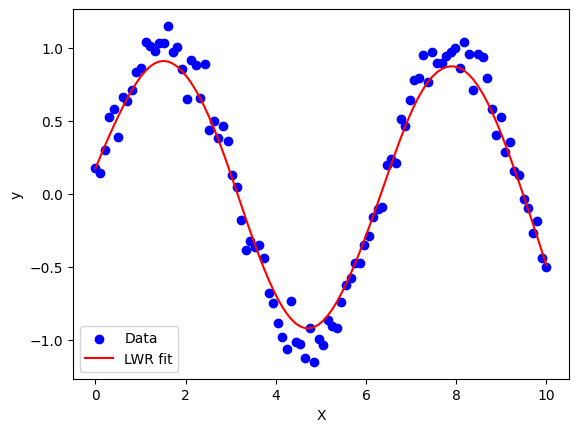

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi)**2) / (2 * tau**2))

def locally_weighted_regression(X, y, tau):
    m = len(X)
    y_pred = np.zeros(m)

    for i in range(m):
        # Compute weights for all data points relative to the i-th query point
        weights = np.array([gaussian_kernel(X[i], X[j], tau) for j in range(m)])

        # Construct the diagonal matrix W
        W = np.diag(weights)

        # Compute the weighted linear regression parameters theta
        XTWX = X.T @ W @ X
        if np.linalg.det(XTWX) == 0:
            theta = np.linalg.pinv(XTWX) @ X.T @ W @ y
        else:
            theta = np.linalg.inv(XTWX) @ X.T @ W @ y

        # Predict the value at the i-th query point
        y_pred[i] = X[i] @ theta

    return y_pred

# Sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, 100)
X_ = np.c_[np.ones_like(X), X]  # Add intercept term

# Parameters
tau = 0.5

# Perform Locally Weighted Regression
y_pred = locally_weighted_regression(X_, y, tau)

# Plotting
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='LWR fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


$$\frac{1}{1 + e^{-z}}$$

### Logistic Regression Theory

**Logistic Regression** is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is a binary variable: it has only two possible outcomes e.g., pass/fail, win/lose, healthy/sick.

### Key Concepts:

1. **Sigmoid Function**:

    - Logistic regression uses the *sigmoid function* to map predictions to probabilities.
    - The sigmoid function is defined as:

      $$\sigma = \frac{1}{1 + e^{-z}}$$

    - This function takes any real-valued number and maps it to a value between 0 and 1.

2. **Hypothesis Representation**:
    - The hypothesis for logistic regression is:
      $$
      h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
      $$
    - Here, $\theta$ is the parameter vector and $\(x\)$ is the feature vector.

3. **Decision Boundary**:
    - The decision boundary is determined by the threshold probability. Typically, if $ h_\theta(x) \geq 0.5 $, we classify the outcome as 1 (positive class), otherwise as 0 (negative class).

4. **Cost Function**:
    - The cost function for logistic regression is the log-loss or binary cross-entropy loss:
      $$
      J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
      $$
    - This cost function is convex, making it suitable for optimization.

5. **Gradient Descent**:
    - To minimize the cost function, we use gradient descent:
      $$
      \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
      $$
    - The gradient of the cost function with respect to $\theta$ is:
      $$
      \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
      $$

Certainly! Let's derive the gradient of the cost function \( J(\theta) \) for logistic regression step by step from the given cost function.

### Cost Function for Logistic Regression

The cost function for logistic regression is:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] $$

Where:
- $m$ is the number of training examples.
- $ h_\theta(x^{(i)}) $ is the predicted probability that the i-th example belongs to the positive class.
- $ y^{(i)} $ is the actual label (0 or 1) of the $i-th$ training example.

### Sigmoid Function

The hypothesis function $ h_\theta(x)$ is defined using the sigmoid function:

$$ h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} $$

  ### ***Steps to Derive Gradient of Cost Function***

  #### 1. Compute the Derivative of the Sigmoid Function

  First, compute the derivative of the sigmoid function:

  $$ \sigma'(z) = \sigma(z) (1 - \sigma(z)) $$

  Where $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$.

  #### 2. Compute the Derivative of the Cost Function with Respect to $ \theta_j $

  The cost function $ J(\theta) $ can be rewritten as:

  $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] $$

  To find the derivative of $ J(\theta) $ with respect to $ \theta_j $:

  $$ \frac{\partial}{\partial \theta_j} J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \frac{1}{h_\theta(x^{(i)})} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) + (1 - y^{(i)}) \frac{1}{1 - h_\theta(x^{(i)})} \cdot \frac{\partial}{\partial \theta_j} (1 - h_\theta(x^{(i)})) \right] $$

  #### 3. Compute Each Partial Derivative

  Let's compute each part separately:

  - **For $ y^{(i)} \log(h_\theta(x^{(i)})) $**:

    $$\frac{\partial}{\partial \theta_j} \log(h_\theta(x^{(i)})) = \frac{1}{h_\theta(x^{(i)})} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) $$

    Using the chain rule:

    $$\frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) = h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) x_j^{(i)} $$

    Therefore,

    $$ \frac{\partial}{\partial \theta_j} \log(h_\theta(x^{(i)})) = \frac{1}{h_\theta(x^{(i)})} \cdot h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) x_j^{(i)} = (1 - h_\theta(x^{(i)})) x_j^{(i)} $$

    Hence,

    $$ \frac{\partial}{\partial \theta_j} \left( y^{(i)} \log(h_\theta(x^{(i)})) \right) = y^{(i)} (1 - h_\theta(x^{(i)})) x_j^{(i)} $$

  - **For $(1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))$**:

    Similarly,

    $$ \frac{\partial}{\partial \theta_j} \log(1 - h_\theta(x^{(i)})) = \frac{-1}{1 - h_\theta(x^{(i)})} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) $$

    Using the chain rule:

    $$ \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) = h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) x_j^{(i)} $$

    Therefore,

    $$ \frac{\partial}{\partial \theta_j} \log(1 - h_\theta(x^{(i)})) = \frac{-1}{1 - h_\theta(x^{(i)})} \cdot h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) x_j^{(i)} = (h_\theta(x^{(i)}) - 1) x_j^{(i)} $$

    Hence,

    $$ \frac{\partial}{\partial \theta_j} \left( (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right) = (1 - y^{(i)}) h_\theta(x^{(i)}) x_j^{(i)} $$

  #### 4. Combine Both Parts

  Now, combining both parts:

  $$ \frac{\partial}{\partial \theta_j} J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} (1 - h_\theta(x^{(i)})) x_j^{(i)} - (1 - y^{(i)}) h_\theta(x^{(i)}) x_j^{(i)} \right] $$

  Simplify the expression:

 $$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ h_\theta(x^{(i)}) - y^{(i)} \right] x_j^{(i)} $$

  This is the gradient of the cost function $J(\theta)$ with respect to $ \theta_j $ for logistic regression.

